In [1]:
import os
from pyannote.audio import Pipeline
from pyannote.core import Segment, notebook, Annotation
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
use_auth_token = os.environ["HUGGINGFACEHUB_API_TOKEN"]

In [3]:
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1", use_auth_token=use_auth_token)

In [4]:
audio_file = "/Users/imdohyeon/Documents/PythonWorkspace/Lieon-ai/Dataset/Train/Audio/data1.wav"

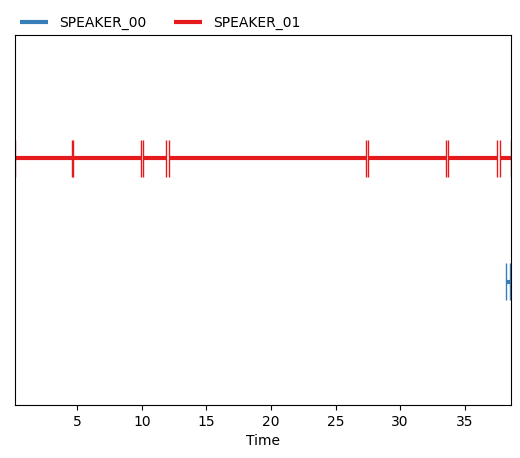

In [8]:
# 음성 파일 처리
if pipeline is not None:
    diarization = pipeline(audio_file, num_speakers=2)

    # 라벨링 결과 출력 및 CSV 파일 저장
    label_mapping = {}
    label_counter = 0  # 라벨 카운터를 1로 시작하여 묵음 라벨과 겹치지 않도록 함

    # CSV 파일 경로
    output_csv_file = "/Users/imdohyeon/Documents/PythonWorkspace/Lieon-ai/Dataset/Train/Label/label1.csv"

    # CSV 파일이 저장될 디렉토리 경로
    output_directory = os.path.dirname(output_csv_file)

    # 디렉토리가 존재하지 않으면 생성
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # CSV 파일 열기 및 헤더 작성
    with open(output_csv_file, 'w', newline='') as csvfile:
        fieldnames = ['Start', 'End', 'Speaker', 'Label']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        # 화자 구간 라벨링
        annotation = Annotation()
        for turn, _, speaker in diarization.itertracks(yield_label=True):
            if speaker not in label_mapping:
                label_mapping[speaker] = label_counter
                label_counter += 1
            label = label_mapping[speaker]
            writer.writerow({'Start': turn.start, 'End': turn.end, 'Speaker': speaker, 'Label': label})
            annotation[Segment(start=turn.start, end=turn.end)] = speaker

    # 시각화
    fig, ax = plt.subplots()
    notebook.plot_annotation(annotation, ax=ax, time=True)
    plt.show()
else:
    print("Failed to load the speaker diarization model.")